In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa

In [2]:
df = pd.read_excel('signal_feature.xlsx')
del df['Unnamed: 0']

In [36]:
df.head()

,signal,path,mfcc,mfcc_mean,zcr,sc,rms,melspectrogram,quality
0,2,F:\RMS Samples\S2\A17BA_12055_1333_27_08_2017.MP3,[-1.19005562e+02 2.06678009e+02 -1.05538704e+...,0.055562,0.114928,1463.040193,0.145157,4.540862,0
1,2,F:\RMS Samples\S2\A17BA_12055_1336_27_08_2017.MP3,[-1.1469097e+02 2.1500935e+02 -1.1449629e+02 ...,0.384692,0.119250,1484.006563,0.147916,4.452103,0
2,2,F:\RMS Samples\S2\A17BA_12055_1341_27_08_2017.MP3,[-1.22675224e+02 2.07198257e+02 -1.02659149e+...,0.464670,0.109778,1413.981019,0.134147,3.892156,0
3,2,F:\RMS Samples\S2\A17BA_12055_1346_27_08_2017.MP3,[-1.1597163e+02 2.1474585e+02 -1.1746875e+02 ...,0.278849,0.119023,1495.144218,0.147518,4.409816,0
4,2,F:\RMS Samples\S2\A17BA_12055_1351_27_08_2017.MP3,[-1.04732437e+02 2.15139145e+02 -1.20868294e+...,0.233441,0.125884,1538.705541,0.154144,4.562316,0


In [7]:
def quality(signal):
    if signal == 1 or signal == 2:
        return 0
    else:
        return 1

In [8]:
df['quality'] = df['signal'].apply(quality)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 9 columns):
signal            408 non-null int64
path              408 non-null object
mfcc              408 non-null object
mfcc_mean         408 non-null float64
zcr               408 non-null float64
sc                408 non-null float64
rms               408 non-null float64
melspectrogram    408 non-null float64
quality           408 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 28.8+ KB


In [18]:
df.describe()

,signal,mfcc_mean,zcr,sc,rms,melspectrogram,quality
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,2.509804,-0.973707,0.116621,1545.845107,0.107266,2.815569,0.502451
std,1.125929,1.552889,0.023544,196.559130,0.044750,1.749397,0.500608
min,1.000000,-6.808770,0.054692,1044.114408,0.005196,0.001990,0.000000
25%,1.750000,-1.259390,0.100047,1432.739391,0.083184,1.451741,0.000000
50%,3.000000,-0.597562,0.115029,1510.920661,0.106676,2.652132,1.000000
75%,4.000000,-0.018491,0.130557,1604.220208,0.145281,4.129977,1.000000
max,4.000000,1.469374,0.166038,2541.239780,0.195066,7.741895,1.000000


In [24]:
df['quality'].value_counts()

1    205
0    203
Name: split, dtype: int64

In [26]:
P_0 = 203/(203+205)
P_1 = 205/(203+205)

In [27]:
entropy_parent = -( P_0*np.log2(P_0) + P_1*np.log2(P_1) )

In [28]:
#Entropy of Quality 
entropy_parent

0.9999826665126543

In [29]:
df['signal'].value_counts()

4    105
1    102
2    101
3    100
Name: members, dtype: int64

In [31]:
import scipy.stats as st
#Entropy of Signal
print (st.entropy([102,101,100,105],base=2))

1.9997583248846351


In [17]:
from scipy.stats import entropy
import pandas as pd
def information_gain(members, split):
    '''
    Measures the reduction in entropy after the split  
    :param v: Pandas Series of the members
    :param split:
    :return:
    '''
    entropy_before = entropy(members.value_counts(normalize=True))
    split.name = 'split'
    members.name = 'members'
    grouped_distrib = members.groupby(split) \
                        .value_counts(normalize=True) \
                        .reset_index(name='count') \
                        .pivot_table(index='split', columns='members', values='count').fillna(0) 
    entropy_after = entropy(grouped_distrib, axis=0)
    entropy_after *= split.value_counts(sort=False, normalize=True)
    return entropy_before - entropy_after.sum()

members = df['signal']
split = df['quality']
print (information_gain(members, split))

TypeError: entropy() got an unexpected keyword argument 'axis'

In [16]:
members = df['signal']
split = df['quality']
members.shape
split.shape

(408,)

In [47]:
p = "[-1.19005562e+02,2.06678009e+02,-1.05538704e+02,4.48204079e+01,1.11865625e+01,-1.92529087e+01,1.06882820e+01,-6.18736935e+00,6.10216188e+00,-1.00257215e+01,2.39508319e+00,4.69961548e+00,-1.31886606e+01,7.41868591e+00,-1.52671719e+00,-3.83753300e+00,3.93492627e+00,-7.81431973e-01,2.34639859e+00,-4.07584858e+00,1.93202055e+00,6.45269215e-01,-4.63217640e+00,4.33690834e+00,-2.32549834e+00,-6.85804307e-01,2.59325719e+00,-1.35948873e+00,1.12610710e+00,-1.97841501e+00,2.35813826e-01,-8.02883685e-01,-2.83340859e+00,6.75041020e-01,-3.37705207e+00,-1.74651301e+00,-1.44945669e+00,-2.96129656e+00,2.03646086e-02,-2.03996587e+00]"

In [58]:
import seaborn as sns

In [68]:
p = [-1.1469097e+02,2.1500935e+02,-1.1449629e+02,4.9527676e+01,9.3154840e+00,-1.9206678e+01,1.1983718e+01,-8.5214376e+00,8.6188974e+00,-1.0890959e+01,5.7270837e-01,5.9147525e+00,-1.3107455e+01,7.7478476e+00,-1.7761862e+00,-2.9357328e+00,4.3633304e+00,-2.1678770e+00,2.7836373e+00,-4.3461537e+00,1.4387857e+00,9.2462170e-01,-5.2273936e+00,3.8505909e+00,-2.2911551e+00,-1.2515810e-01,1.8591126e+00,-2.2373650e+00,1.7675447e+00,-1.5231973e+00,8.3124447e-01,1.7811665e-01,-1.5109183e+00,1.6352978e+00,-2.6037316e+00,-1.1576887e-01,-7.8922659e-01,-2.9496646e+00,4.7315314e-01,-1.8948734e+00 ]
#p= [-1.19005562e+02,2.06678009e+02,-1.05538704e+02,4.48204079e+01,1.11865625e+01,-1.92529087e+01,1.06882820e+01,-6.18736935e+00,6.10216188e+00,-1.00257215e+01,2.39508319e+00,4.69961548e+00,-1.31886606e+01,7.41868591e+00,-1.52671719e+00,-3.83753300e+00,3.93492627e+00,-7.81431973e-01,2.34639859e+00,-4.07584858e+00,1.93202055e+00,6.45269215e-01,-4.63217640e+00,4.33690834e+00,-2.32549834e+00,-6.85804307e-01,2.59325719e+00,-1.35948873e+00,1.12610710e+00,-1.97841501e+00,2.35813826e-01,-8.02883685e-01,-2.83340859e+00,6.75041020e-01,-3.37705207e+00,-1.74651301e+00,-1.44945669e+00,-2.96129656e+00,2.03646086e-02,-2.03996587e+00]

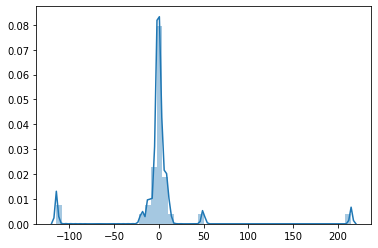

In [69]:
sns.distplot(p)

In [51]:
for i in range(0, len(p)): 
    p[i] = int(p[i]) 
      
  
# Printing modified list  
print ("Modified list is : " + str(p)) 

ValueError: invalid literal for int() with base 10: '['

In [61]:
pf = pd.read_csv('signal_feature_new.csv')

In [62]:
pf.head()

,Unnamed: 0,signal,path,mfcc,mfcc_mean,zcr,sc,rms,melspectrogram
0,0,2,F:\RMS Samples\S2\A17BA_12055_1333_27_08_2017.MP3,"[-1.19005562e+02,2.06678009e+02,-1.05538704e+0...",0.055562,0.114928,1463.040193,0.145157,4.540862
1,1,2,F:\RMS Samples\S2\A17BA_12055_1336_27_08_2017.MP3,"[-1.1469097e+02,2.1500935e+02,-1.1449629e+02,4...",0.384692,0.119250,1484.006563,0.147916,4.452103
2,2,2,F:\RMS Samples\S2\A17BA_12055_1341_27_08_2017.MP3,"[-1.22675224e+02,2.07198257e+02,-1.02659149e+0...",0.464670,0.109778,1413.981019,0.134147,3.892156
3,3,2,F:\RMS Samples\S2\A17BA_12055_1346_27_08_2017.MP3,"[-1.1597163e+02,2.1474585e+02,-1.1746875e+02,4...",0.278849,0.119023,1495.144218,0.147518,4.409816
4,4,2,F:\RMS Samples\S2\A17BA_12055_1351_27_08_2017.MP3,"[-1.04732437e+02,2.15139145e+02,-1.20868294e+0...",0.233441,0.125884,1538.705541,0.154144,4.562316


In [71]:
df['mfcc'][0]

'[-1.19005562e+02  2.06678009e+02 -1.05538704e+02  4.48204079e+01\n  1.11865625e+01 -1.92529087e+01  1.06882820e+01 -6.18736935e+00\n  6.10216188e+00 -1.00257215e+01  2.39508319e+00  4.69961548e+00\n -1.31886606e+01  7.41868591e+00 -1.52671719e+00 -3.83753300e+00\n  3.93492627e+00 -7.81431973e-01  2.34639859e+00 -4.07584858e+00\n  1.93202055e+00  6.45269215e-01 -4.63217640e+00  4.33690834e+00\n -2.32549834e+00 -6.85804307e-01  2.59325719e+00 -1.35948873e+00\n  1.12610710e+00 -1.97841501e+00  2.35813826e-01 -8.02883685e-01\n -2.83340859e+00  6.75041020e-01 -3.37705207e+00 -1.74651301e+00\n -1.44945669e+00 -2.96129656e+00  2.03646086e-02 -2.03996587e+00]'

In [84]:
from bs4 import BeautifulSoup as bs
import requests
video_url = "https://www.youtube.com/watch?v=jNQXAC9IVRw"
content = requests.get(video_url)
soup = bs(content.content, "html.parser")
open("video.html", "w", encoding='utf8').write(content.text)


398632

In [94]:
print(soup.find("span", attrs={'class': 'view-count style-scope yt-view-count-renderer'}))

None


In [103]:
p = soup.findAll("div",{"class":"table-body"})

In [105]:
p

[]